# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:

#Observations:
    
    #The temperature correspondes well with the latitude. Latitude moves away from equator, temperature also 
#decreases. There is no correlation between humidity and latitude. Wind speed tends 
#to be higher closer to the arctic and antarctic.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import api_keys
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#City for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# OpenWeatherMap API Key
api_key = api_keys.weather_api_key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter 
        record= record + 1
        
        # Wait in loop to not over exceed rate limit of API
        time.sleep(0.025)
        
    # If no record found skip to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Saint Paul Harbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14f879adea2b2d9bc8036adaf05f4836&q=kodiak
Processing Record 2 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14f879adea2b2d9bc8036adaf05f4836&q=punta%20arenas
Processing Record 3 | Tonantins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14f879adea2b2d9bc8036adaf05f4836&q=tonantins
Processing Record 4 | Kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14f879adea2b2d9bc8036adaf05f4836&q=kaitangata
Processing Record 5 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14f879adea2b2d9bc8036adaf05f4836&q=iqaluit
Processing Record 6 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14f879adea2b2d9bc8036adaf05f4836&q=butaritari
Processing Record 7 | Sal Rei
http://api.openweathermap.org/

In [10]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
# Save data frame to CSV
weather_data.to_csv('../output_data/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint Paul Harbor,1,US,1595505130,62,57.79,-152.41,57.20,10.29
1,Punta Arenas,65,CL,1595505130,89,-53.15,-70.92,35.60,13.87
2,Tonantins,92,BR,1595505131,97,-2.87,-67.80,73.51,1.19
3,Kaitangata,12,NZ,1595505131,76,-46.28,169.85,37.99,5.01
4,Iqaluit,75,CA,1595505131,76,63.75,-68.51,50.00,9.17


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

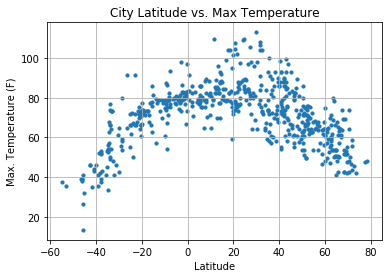

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

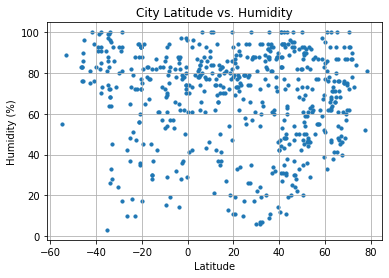

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

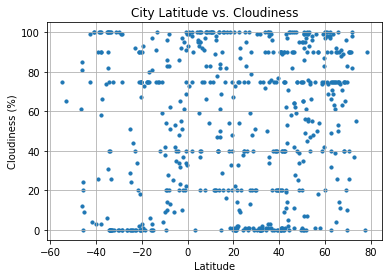

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

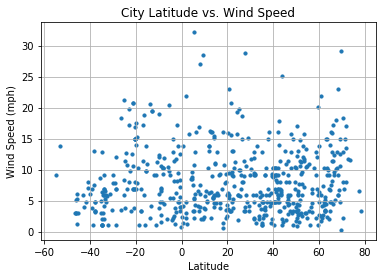

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

def plotLinearRegression(xdata,ydata,xlabel,ylabel,labelpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,labelpos,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(f"../output_data/fig{ifig}.png")
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames
crit_north = weather_data.Lat>= 0
crit_south = weather_data.Lat < 0

# Create the north and south hemisphere dataframes using boolean indexing from the criteria from above 
north_weather = weather_data[crit_north]
south_weather = weather_data[crit_south]

# The indexes will not be continuous so they need to be reset with the drop=True argument so we don't make
# the prior index as a column
north_weather = north_weather.reset_index(drop=True)
south_weather = south_weather.reset_index(drop=True)
#north_weather.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6478552544185897


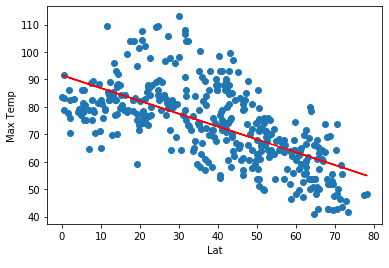

In [18]:
xlabel = "Lat"
ylabel = "Max Temp"
labelpos = (0,25)
plotLinearRegression(north_weather[xlabel],north_weather[ylabel],xlabel,ylabel,labelpos,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8272566279110652


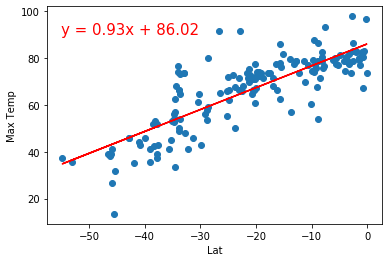

In [19]:
xlabel = "Lat"
ylabel = "Max Temp"
labelpos = (-55,90)
plotLinearRegression(south_weather[xlabel],south_weather[ylabel],xlabel,ylabel,labelpos,6)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.034063316700526286


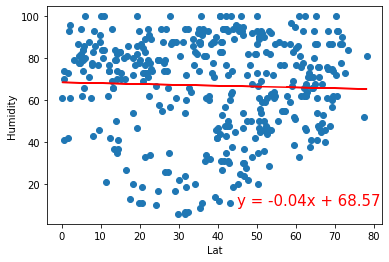

In [20]:
xlabel = "Lat"
ylabel = "Humidity"
labelpos = (45,10)
plotLinearRegression(north_weather[xlabel],north_weather[ylabel],xlabel,ylabel,labelpos,7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.1956811606666026


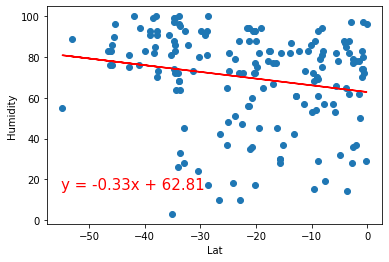

In [21]:
xlabel = "Lat"
ylabel = "Humidity"
labelpos = (-55,15)
plotLinearRegression(south_weather[xlabel],south_weather[ylabel],xlabel,ylabel,labelpos,8)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.046071284738436385


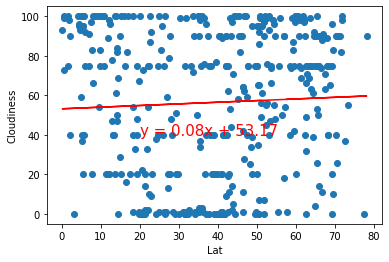

In [22]:
xlabel = "Lat"
ylabel = "Cloudiness"
labelpos = (20,40)
plotLinearRegression(north_weather[xlabel],north_weather[ylabel],xlabel,ylabel,labelpos,9)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.024086280212547197


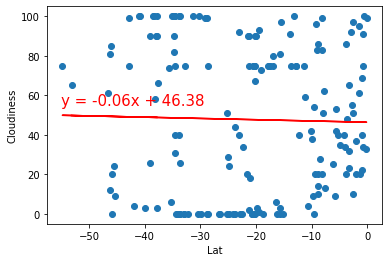

In [23]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,55)
plotLinearRegression(south_weather[xlbl],south_weather[ylbl],xlbl,ylbl,lblpos,10)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009461309210140921


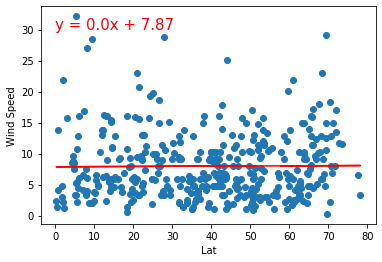

In [24]:
xlabel = "Lat"
ylabel = "Wind Speed"
labelpos = (0,30)
plotLinearRegression(north_weather[xlabel],north_weather[ylabel],xlabel,ylabel,labelpos,11)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.19298621457217993


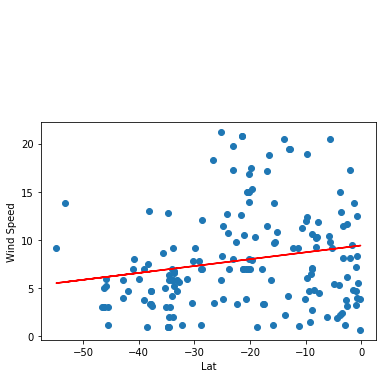

In [25]:
xlabel = "Lat"
ylabel = "Wind Speed"
labelpos = (-25,33)
plotLinearRegression(south_weather[xlabel],south_weather[ylabel],xlabel,ylabel,labelpos,12)